In [16]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.special import softmax
import warnings
from random import sample
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


warnings.simplefilter("ignore")

In [17]:
df = pd.read_pickle("dataframes/short_features_logits.pkl")

In [18]:
bins = np.linspace(0, 1, 11)
bins_pos = bins[: -1] + 0.05

In [19]:
df["Predicted Class"] = [np.argmax(softmax(l)) for l in df["Logits"]]
# df["Confidence"] = [softmax(l)[idx] for l, idx in zip(df["Logits"], df["Class Idx"])]
df["Confidence"] = [np.max(softmax(l)) for l in df["Logits"]]
df["Accuracy"] = 1. * (df["Predicted Class"] == df["Class Idx"])
df["Binned Confidence"] = pd.cut(df["Confidence"], np.linspace(0, 1, 11), labels=bins_pos)

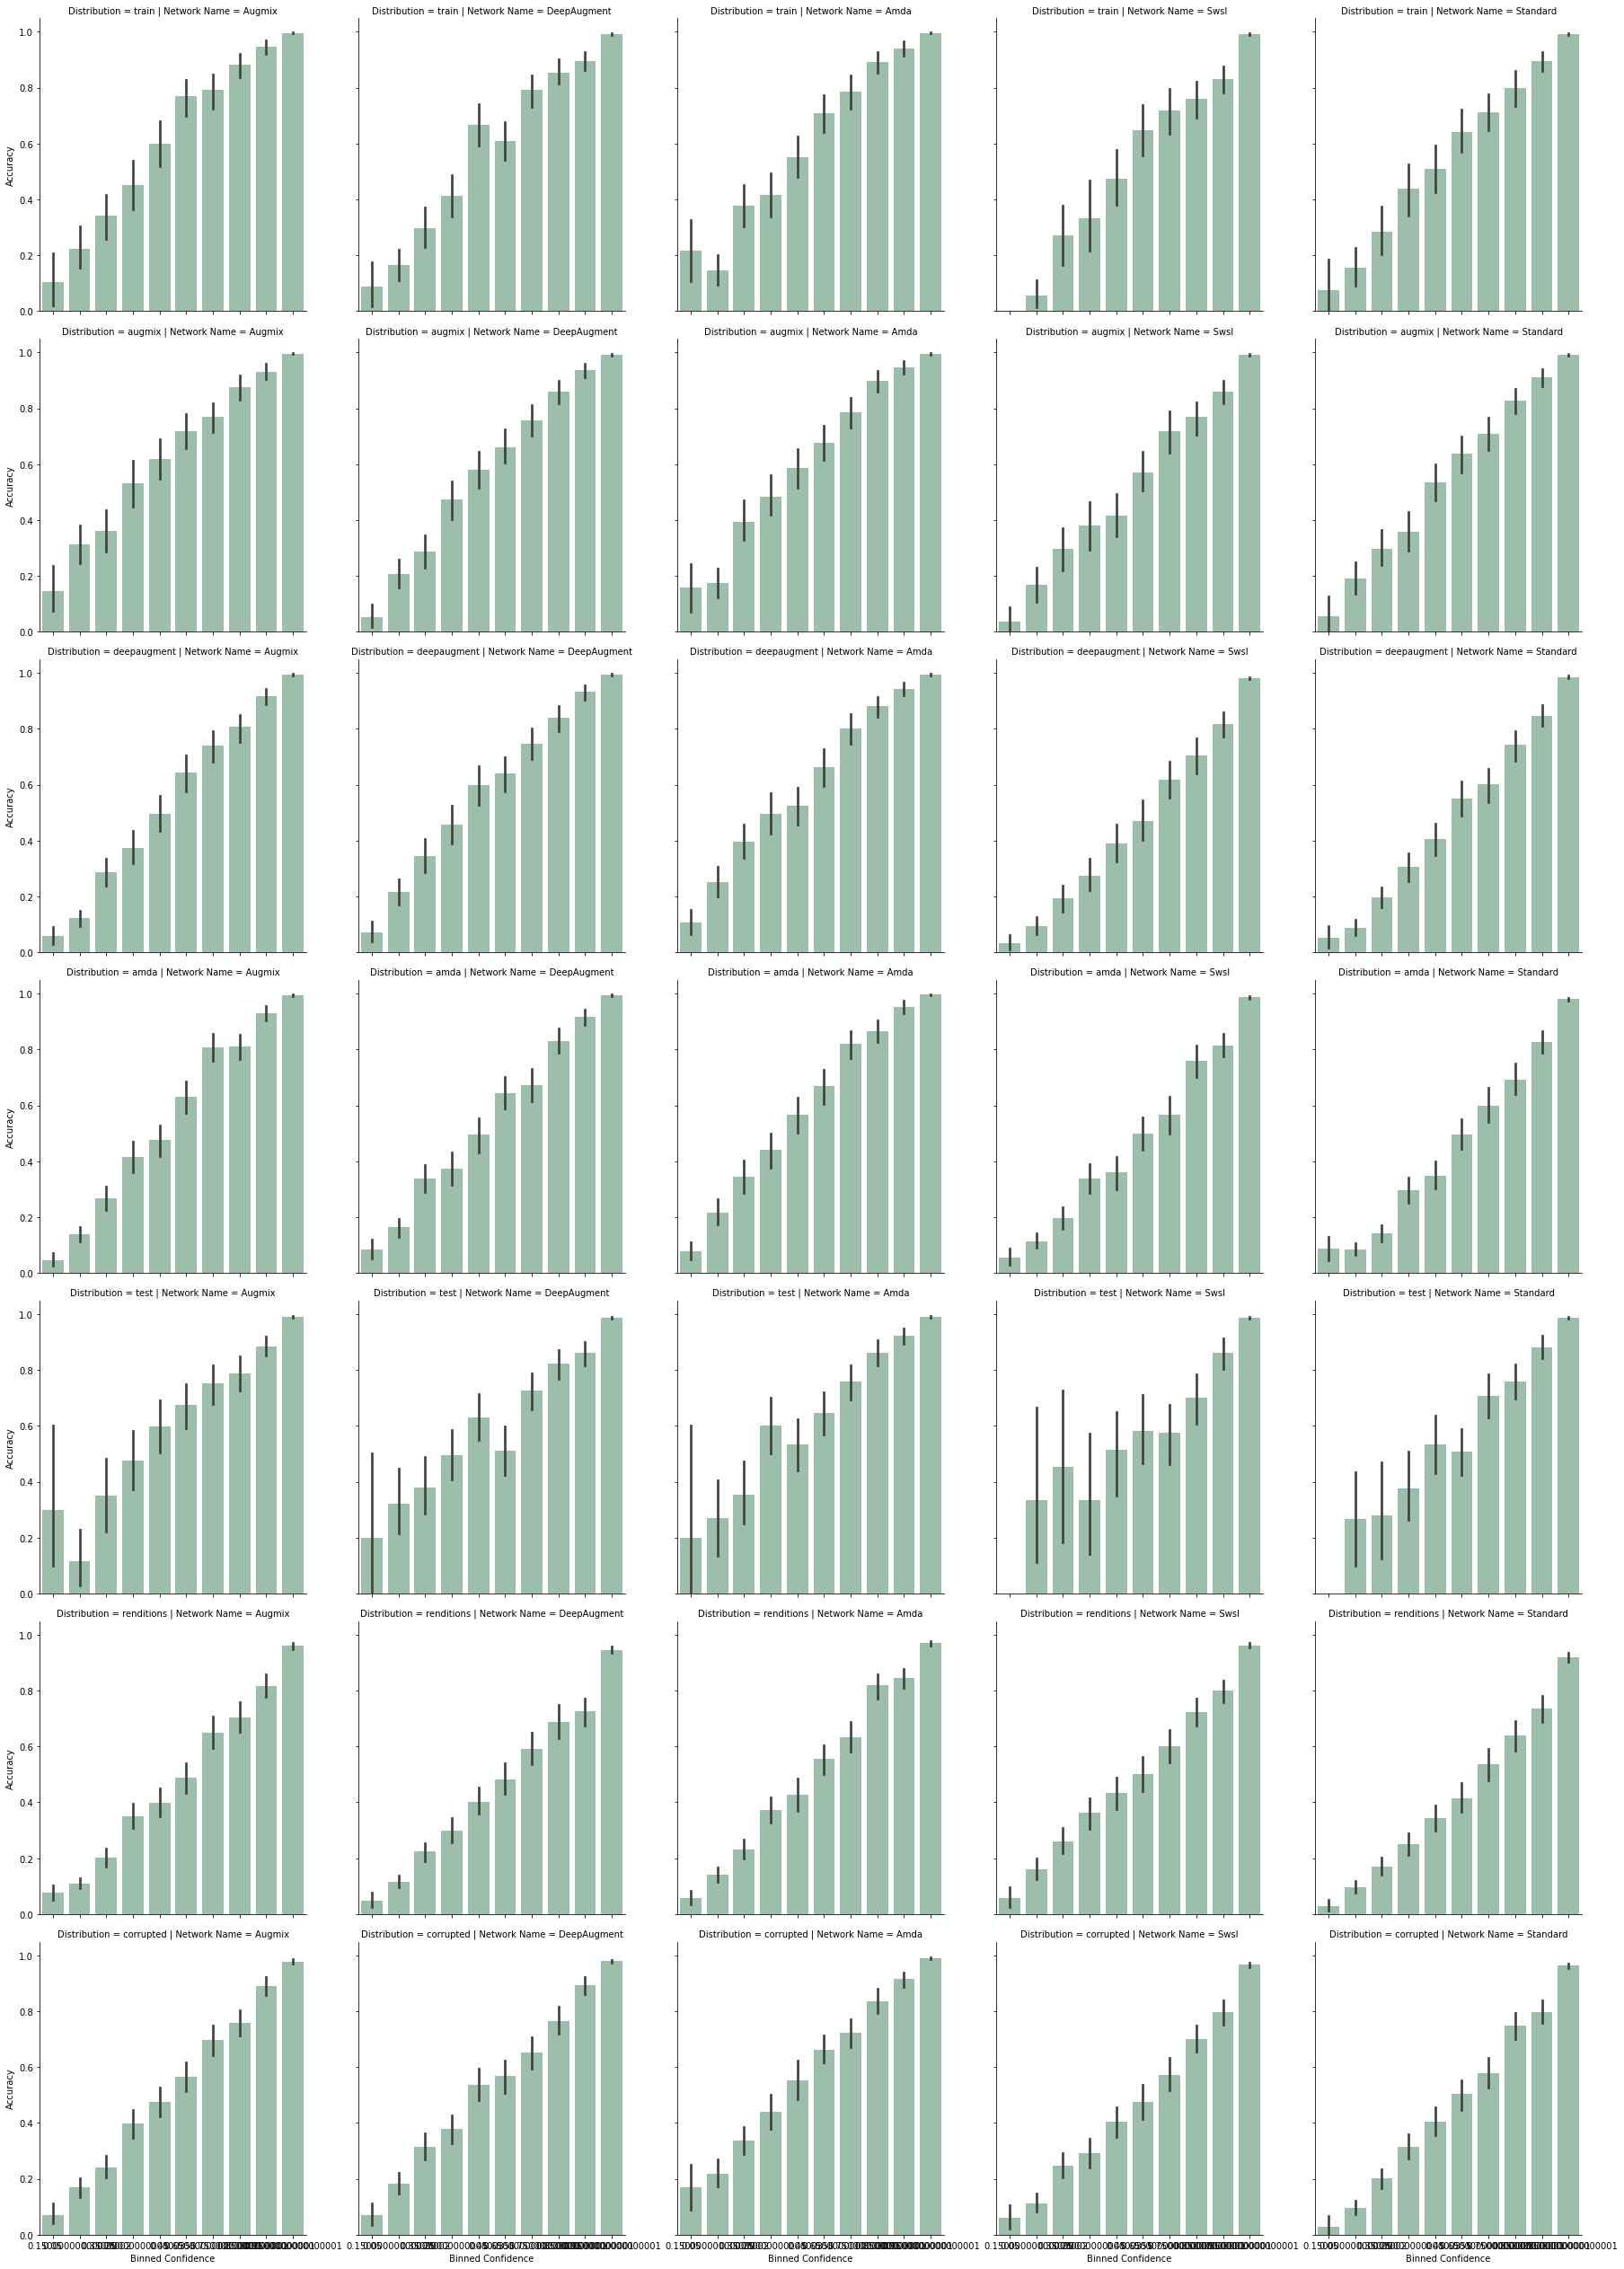

In [22]:
g = sns.catplot(x="Binned Confidence", y="Accuracy", data=df, kind="bar", row="Distribution", col="Network Name", color="seagreen", alpha=0.5)

In [ ]:
df["ECE"] = 